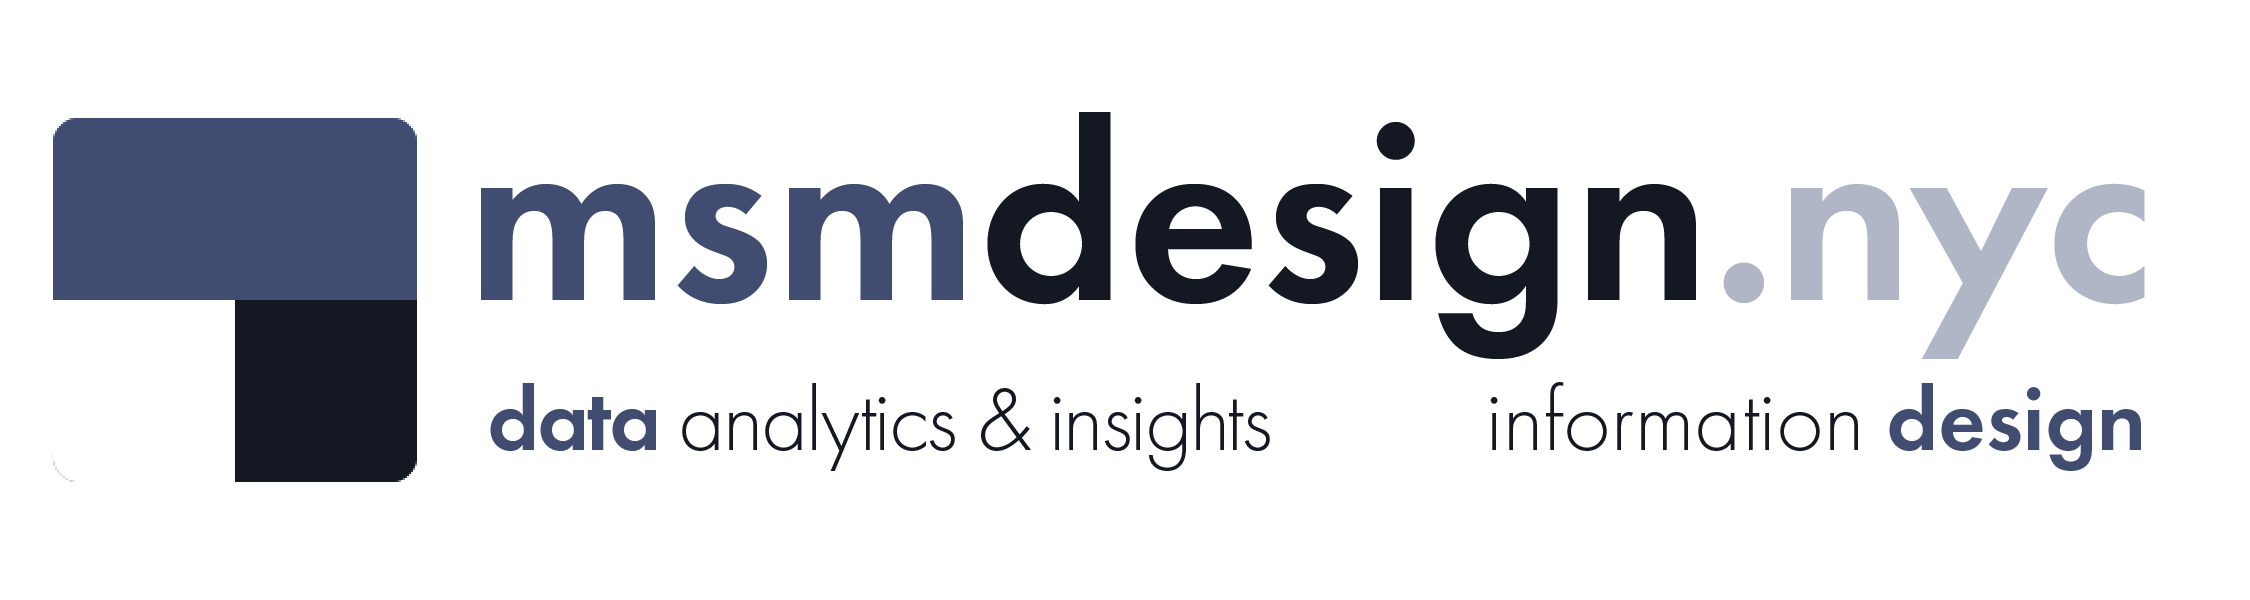

---
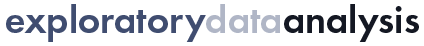

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# Inspections

**Dataset Analyzed:** *Inspections*

**About This Dataset:** This data set features DCA inspections during the last and current calendar years to ensure compliance with local consumer protection and licensing laws, and State and federal regulations. Data provided by Department of Consumer and Worker Protection (DCWP), The City of New York:https://data.cityofnewyork.us/Business/Inspections/jzhd-m6uv


**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-005


**EDA Publication Date:** Thursday, January 5, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib, seaborn


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [1]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [3]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='viridis',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [4]:
%%html
<style>
table {float:left}
</style>

### 0.4 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [5]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\ins-005\data\Inspections.csv"

inspections_temp = pd.read_csv(csv, encoding='utf-8')

In [6]:
# glimpse the first three rows

inspections_temp.head(3)

,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude
0,16005-2019-ENFO,05439358,STAY FRESH DELI & GRILL CORP.,03/14/2019,Violation Issued,Grocery-Retail - 808,Brooklyn,1695A,BROADWAY,NaN,NaN,NaN,NaN,BROOKLYN,NY,11207.0,-73.912103,40.683851
1,62345-2018-ENFO,03090119,DOWNTOWN BRONX DELI CORP.,12/07/2018,Pass,Grocery-Retail - 808,Bronx,622,MELROSE AVE,NaN,NaN,NaN,NaN,BRONX,NY,10455.0,-73.916955,40.817842
2,52836-2019-ENFO,09466854,"SHIM, JAE TAEK",10/04/2019,Out of Business,Misc Non-Food Retail - 817,Queens,7952,ALBION AVE,NaN,NaN,NaN,NaN,ELMHURST,NY,11373.0,-73.884388,40.739252


In [7]:
# glimpse the last three rows

inspections_temp.tail(3)

,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude
614111,68271-2022-ENFO,22M02381,980 COLUMBUS FOOD CORP.,11/17/2022,Violation Issued,Electronic Cigarette Dealer,Manhattan,980,COLUMBUS AVE,NaN,NaN,NaN,NaN,NEW YORK,NY,10025.0,-77.519855,40.11249
614112,67189-2022-ENFO,A0098722,2220 ONE WAY DELI GROCERY CORP,11/16/2022,Closed,Electronic Cigarette Dealer,Bronx,2218,OLINVILLE AVE,NaN,#,2220,NaN,BRONX,NY,10467.0,-77.519855,40.11249
614113,67716-2022-ENFO,A0098939,DISTINCTIVE PARKING LLC,11/17/2022,No Violation Issued,Garage - 049,Manhattan,35,E 61ST ST,NaN,NaN,NaN,35-39; AKA 540 PARK AVE,NEW YORK,NY,10065.0,-77.519855,40.11249


In [8]:
# glimpse ten randomly selected rows

inspections_temp.sample(10, random_state=8)

,Record ID,Certificate Number,Business Name,Inspection Date,Inspection Result,Industry,Borough,Building Number,Street,Street 2,Unit Type,Unit,Description,City,State,Zip,Longitude,Latitude
111962,51665-2019-ENFO,50112288,RED DELICIOUS DELI GROCERY INC,10/23/2019,No Violation Issued,Tobacco Retail Dealer,Queens,4832,104TH ST,NaN,NaN,NaN,NaN,CORONA,NY,11368.0,-73.858854,40.744334
218509,60517-2019-ENFO,09467188,RAIMUNDO E HIDALGO,12/03/2019,Out of Business,Misc Non-Food Retail - 817,Queens,5815,31ST AVE,NaN,NaN,NaN,NaN,WOODSIDE,NY,11377.0,-73.903538,40.757401
96862,47718-2019-ENFO,09461686,"A.R. WALKER & COMPANY, INC.",09/11/2019,No Evidence of Activity,Parking Lot - 050,Manhattan,161,W 82ND ST,NaN,NaN,NaN,NaN,NEW YORK,NY,10024.0,-73.975698,40.784601
297945,36344-2014-ENFO,03003985,"214-50 JAMAICA LAUNDROMAT, LLC",06/27/2014,Pass,Laundry - 064,Queens,21450,JAMAICA AVE,NaN,NaN,NaN,NaN,QUEENS VILLAGE,NY,11428.0,-73.742037,40.716791
67051,33249-2019-ENFO,09451431,SP PLUS CORPORATION,06/13/2019,No Violation Issued,Garage - 049,Brooklyn,196,CADMAN PLZ W,NaN,NaN,NaN,NaN,BROOKLYN,NY,11201.0,-73.991442,40.698445
116449,57155-2019-ENFO,50112115,DIPAKKUMAR PATEL,11/09/2019,No Violation Issued,Electronic Cigarette Dealer,Queens,S/W/C,QUEENS BOULEVARD,WOODHAVEN BOULEVARD,NaN,NaN,NaN,Elmhurst,NY,11373.0,-73.870369,40.733497
131273,13182-2018-ENFO,09395830,"AT&T MOBILITY SUPPLY, LLC",02/28/2018,No Violation Issued,Electronic Store - 001,Brooklyn,476,FULTON ST,NaN,NaN,NaN,NaN,BROOKLYN,NY,11201.0,-73.983961,40.690092
440248,61613-2014-ENFO,09291571,ALLAH TAWAKAL GROCERY & HALAL MEAT INC.,10/29/2014,No Violation Issued,Stoop Line Stand - 033,Queens,2718,30TH AVE,NaN,NaN,NaN,NaN,ASTORIA,NY,11102.0,-73.923826,40.768025
189407,32750-2014-ENFO,09260633,"TONY'S JAMAICA MARKET, CORP.",05/12/2014,No Violation Issued,Cigarette Retail Dealer - 127,Queens,9420,SUTPHIN BLVD,NaN,NaN,NaN,NaN,JAMAICA,NY,11435.0,-73.806820,40.698835
12084,1514-2020-ENFO,70054857,453 HARLEM DELI CORP,01/04/2020,Violation Issued,Tobacco Retail Dealer,Manhattan,453,W 125TH ST,NaN,NaN,NaN,NaN,NEW YORK,NY,10027.0,-73.955714,40.812761


**The data has been loaded and has been read in as expected.**

### 0.5. Check the data type of each column

In [9]:
# display a listing of each of the DataFrame's columns and its data type
inspections_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614114 entries, 0 to 614113
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Record ID           614114 non-null  object 
 1   Certificate Number  614114 non-null  object 
 2   Business Name       609109 non-null  object 
 3   Inspection Date     614114 non-null  object 
 4   Inspection Result   614114 non-null  object 
 5   Industry            613743 non-null  object 
 6   Borough             613224 non-null  object 
 7   Building Number     580763 non-null  object 
 8   Street              587382 non-null  object 
 9   Street 2            12420 non-null   object 
 10  Unit Type           32922 non-null   object 
 11  Unit                30447 non-null   object 
 12  Description         16469 non-null   object 
 13  City                613451 non-null  object 
 14  State               612765 non-null  object 
 15  Zip                 613408 non-nul

**Almost all of the columns have been read in as *object* data type. We'll need to change the data type of some columns to a something more appropriate.**

### 0.6 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/jzhd-m6uv/files/8831a57e-fa51-40cb-850f-4f6293e73979?download=true&filename=DCA%20Inspections%20Data%20Dictionary.pdf) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [13]:
# cast column to datetime data type
inspections_temp['Inspection Date'] = pd.to_datetime(inspections_temp['Inspection Date'], errors='coerce')

In [15]:
# cast column to categorical data type

inspections_temp['Inspection Result'] = inspections_temp['Inspection Result'].astype('category')
inspections_temp['Industry']          = inspections_temp['Industry'].astype('category')
inspections_temp['Borough']           = inspections_temp['Borough'].astype('category')
inspections_temp['Unit Type']         = inspections_temp['Unit Type'].astype('category')
inspections_temp['City']              = inspections_temp['City'].astype('category')
inspections_temp['State']             = inspections_temp['State'].astype('category')
inspections_temp['Zip']               = inspections_temp['Zip'].astype('category')

In [16]:
# display the DataFrame info once again to confirm that the data type changes have been made

inspections_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614114 entries, 0 to 614113
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Record ID           614114 non-null  object        
 1   Certificate Number  614114 non-null  object        
 2   Business Name       609109 non-null  object        
 3   Inspection Date     614114 non-null  datetime64[ns]
 4   Inspection Result   614114 non-null  category      
 5   Industry            613743 non-null  category      
 6   Borough             613224 non-null  category      
 7   Building Number     580763 non-null  object        
 8   Street              587382 non-null  object        
 9   Street 2            12420 non-null   object        
 10  Unit Type           32922 non-null   category      
 11  Unit                30447 non-null   object        
 12  Description         16469 non-null   object        
 13  City                613451 no

---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our data set?

In [17]:
# display the number of rows and columns in the DataFrame

rows = inspections_temp.shape[0]
columns = inspections_temp.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 614114 rows and 18 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [18]:
# display the index of the DataFrame

inspections_temp.index

RangeIndex(start=0, stop=614114, step=1)

Our DataFrame has an interger index. We know from the data dictionary that each row is an individual inspection.

### 1.3 What are the column headings in our dataset?

In [19]:
# display a list of the DataFrame's columns

all_cols = list(inspections_temp.columns)
print(all_cols)

['Record ID', 'Certificate Number', 'Business Name', 'Inspection Date', 'Inspection Result', 'Industry', 'Borough', 'Building Number', 'Street', 'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip', 'Longitude', 'Latitude']


### 1.4 What are the data types of each column?

In [20]:
# display the data type of each column in the DataFrame

inspections_temp.dtypes

Record ID                     object
Certificate Number            object
Business Name                 object
Inspection Date       datetime64[ns]
Inspection Result           category
Industry                    category
Borough                     category
Building Number               object
Street                        object
Street 2                      object
Unit Type                   category
Unit                          object
Description                   object
City                        category
State                       category
Zip                         category
Longitude                    float64
Latitude                     float64
dtype: object

### 1.5 How many null values are in each column?

In [21]:
# display the number of missing values in each column of the DataFrame

inspections_temp.isna().sum()

Record ID                  0
Certificate Number         0
Business Name           5005
Inspection Date            0
Inspection Result          0
Industry                 371
Borough                  890
Building Number        33351
Street                 26732
Street 2              601694
Unit Type             581192
Unit                  583667
Description           597645
City                     663
State                   1349
Zip                      706
Longitude              32330
Latitude               32330
dtype: int64

### 1.6 How many unique values are there in each column?

In [22]:
# display the count of unique elements in each column

inspections_temp.nunique(axis=0, dropna=True)

Record ID             594942
Certificate Number    575721
Business Name         134329
Inspection Date         2941
Inspection Result         27
Industry                 109
Borough                   10
Building Number        14074
Street                  4226
Street 2                1617
Unit Type                 21
Unit                    1335
Description             3415
City                     619
State                     25
Zip                      665
Longitude              78143
Latitude               78144
dtype: int64

---

## **2. Briefly summarize the contents of the dataset**

### 2.1 Summarize the columns containing datetime variables

In [27]:
# summarize the data contained in columns with the 'datetime' data type only

inspections_temp['Inspection Date'].describe(datetime_is_numeric=True) 

count                           614114
mean     2018-02-17 22:30:14.649397248
min                2014-01-02 00:00:00
25%                2016-01-14 00:00:00
50%                2017-11-06 00:00:00
75%                2020-01-15 00:00:00
max                2022-11-22 00:00:00
Name: Inspection Date, dtype: object

### 2.2 Summarize the columns containing categorical variables

In [28]:
# summarize the data contained in columns with the 'category' data type only

inspections_temp.describe(include=['category'])

,Inspection Result,Industry,Borough,Unit Type,City,State,Zip
count,614114,613743,613224,32922,613451,612765,613408.0
unique,27,109,10,21,619,25,665.0
top,No Violation Issued,Grocery-Retail - 808,Brooklyn,FRNT,BROOKLYN,NY,11220.0
freq,231600,86500,183179,10180,182888,610798,11413.0


---

## **3. Select a subset of data for closer examination**

### 3.1 Select a subset of columns

In [ ]:
# display all columns

list(df.columns)

In [31]:
# select a subset of columns to examine
selected_cols = ['Inspection Date',
                 'Inspection Result',
                 'Industry',
                 'Borough',
                 'City',
                 'State',
                 'Zip']

inspections = inspections_temp[selected_cols]

In [33]:
# display the size of the new data subset

rows = inspections.shape[0]
columns = inspections.shape[1]

print(f'There are {rows} rows and {columns} columns in the data subset.')

There are 614114 rows and 7 columns in the data subset.


---

## 4. **Describe and summarize the selected subset of data**

### 4.1 Explore individual Series in the DataFrame

In [34]:
# what is the range of dates represented in the data set?

print(inspections['Inspection Date'].min())
print('to')
print(inspections['Inspection Date'].max())

2014-01-02 00:00:00
to
2022-11-22 00:00:00


In [49]:
# what is the distribution of inspection dates

inspections['Inspection Date'].value_counts(bins=10)

(2015-10-13 04:48:00, 2016-09-01 19:12:00]              76743
(2016-09-01 19:12:00, 2017-07-23 09:36:00]              71834
(2017-07-23 09:36:00, 2018-06-13]                       67841
(2013-12-29 18:05:45.599999999, 2014-11-22 14:24:00]    67572
(2014-11-22 14:24:00, 2015-10-13 04:48:00]              67334
(2022-01-01 09:36:00, 2022-11-22]                       65517
(2018-06-13, 2019-05-03 14:24:00]                       64018
(2019-05-03 14:24:00, 2020-03-23 04:48:00]              56954
(2021-02-10 19:12:00, 2022-01-01 09:36:00]              46823
(2020-03-23 04:48:00, 2021-02-10 19:12:00]              29478
Name: Inspection Date, dtype: int64

<AxesSubplot:>

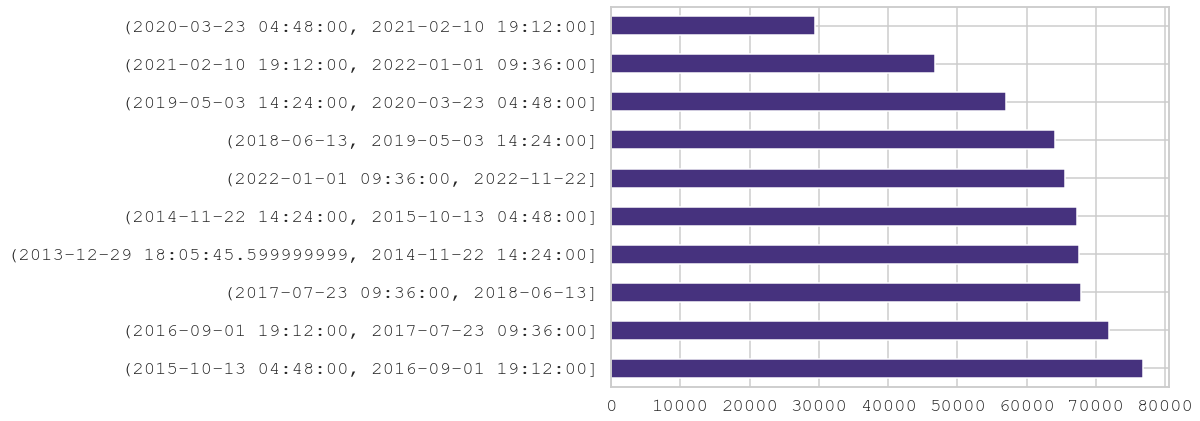

In [48]:
inspections['Inspection Date'].value_counts(bins=10).plot(kind='barh', figsize=(10,7))

In [35]:
# what is the distribution of inspection results?

inspections['Inspection Result'].value_counts()

No Violation Issued              231600
Violation Issued                 113557
Pass                             103878
Out of Business                   59563
Warning                           33827
No Evidence of Activity           26035
Closed                            17533
No Warning Issued                  9230
Fail                               6531
Unable to Locate                   2611
ECB Summons Issued                 2569
Re-inspection                      1751
Unidentified Vendor/Business       1659
NOH Withdrawn                      1210
Posting Order Served                885
Licensed                            509
Residential                         336
ECB Warning Issued                  254
Unable to Complete Inspection       164
Samples Obtained                    142
Business Padlocked                   91
Completed                            53
Confiscated                          47
License Confiscated                  47
Condemned                            22


<AxesSubplot:>

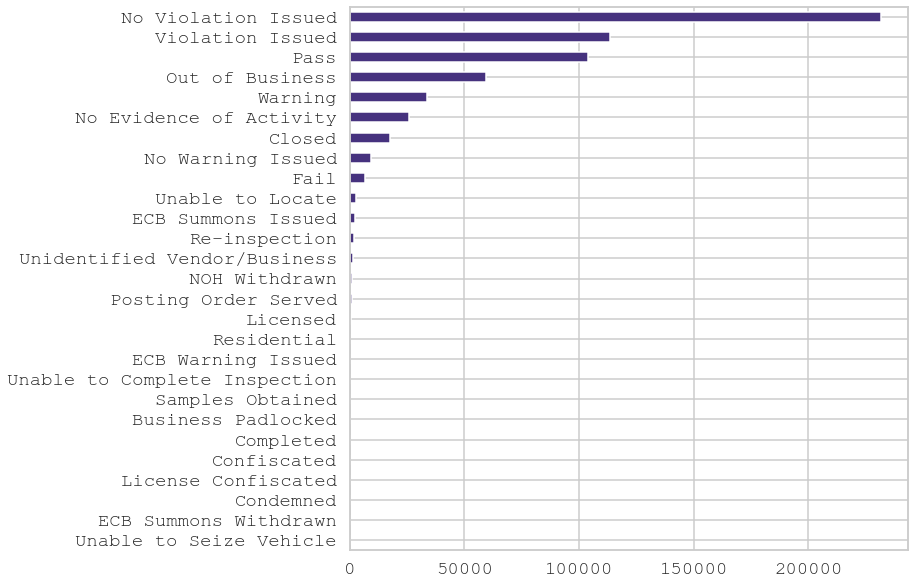

In [40]:
inspections['Inspection Result'].value_counts().sort_values().plot(kind='barh', figsize=(10,10))

In [70]:
# what is the distribution of industries represented in the data set

inspections['Industry'].nunique()

109

In [68]:
pd.set_option("display.max_rows", None)
inspections['Industry'].value_counts()

Grocery-Retail - 808                                86500
Cigarette Retail Dealer - 127                       85551
Tobacco Retail Dealer                               57895
Misc Non-Food Retail - 817                          49320
Secondhand Dealer [General] - 006                   27806
Salons And Barbershop - 841                         27104
Electronic Store - 001                              24909
Electronic Cigarette Dealer                         18817
Laundries                                           15727
Stoop Line Stand - 033                              15525
Mobile Food Vendor - 881                            14954
Supermarket - 819                                   14359
Wearing Apparel - 450                               13660
Drug Store Retail - 810                             12832
Tow Truck Company - 124                             11795
Gas Station-Retail - 815                            11513
Electronic & Home Appliance Service Dealer - 115    10647
Garage - 049  

In [71]:
# what is the distribution of inspections by borough?

inspections['Borough'].value_counts()

Brooklyn         183179
Queens           150294
Manhattan        149361
Bronx             98395
Staten Island     24641
MANHATTAN          3771
Outside NYC        2700
BRONX               302
BROOKLYN            302
QUEENS              279
Name: Borough, dtype: int64

In [83]:
# change the values to title case to correct for inconsistency in data norming

inspections['Borough'].str.title().value_counts()

Brooklyn         183481
Manhattan        153132
Queens           150573
Bronx             98697
Staten Island     24641
Outside Nyc        2700
Name: Borough, dtype: int64

<AxesSubplot:>

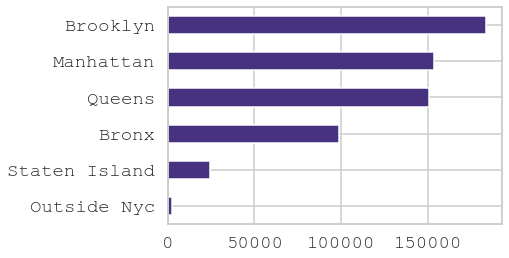

In [85]:
inspections['Borough'].str.title().value_counts().sort_values().plot(kind='barh')

In [88]:
# what are zip codes with the most inspections?

inspections['Zip'].value_counts().nlargest(10)

11220.0    11413
11368.0     8980
11385.0     8747
10019.0     8534
11372.0     8519
11207.0     7499
11226.0     7307
11377.0     7141
11208.0     7004
11215.0     6951
Name: Zip, dtype: int64

### 4.2 Explore the data set using groupby and crosstab

In [92]:
# how many inspections were conducted each year

inspections['Inspection Date'].groupby(inspections['Inspection Date'].dt.year).count()

Inspection Date
2014    74374
2015    76414
2016    85180
2017    81690
2018    71897
2019    69073
2020    39462
2021    50507
2022    65517
Name: Inspection Date, dtype: int64

<AxesSubplot:xlabel='Inspection Date'>

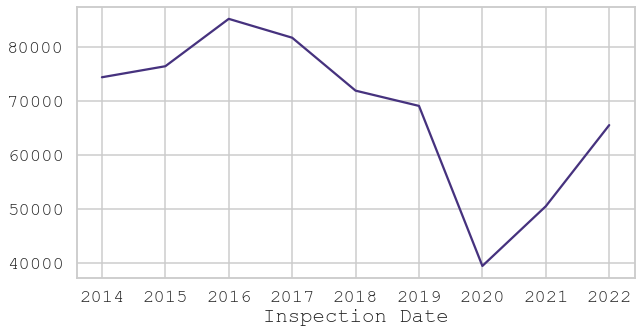

In [115]:
inspections['Inspection Date'].groupby(inspections['Inspection Date'].dt.year).count().plot(figsize=(10,5))

<AxesSubplot:xlabel='Inspection Date'>

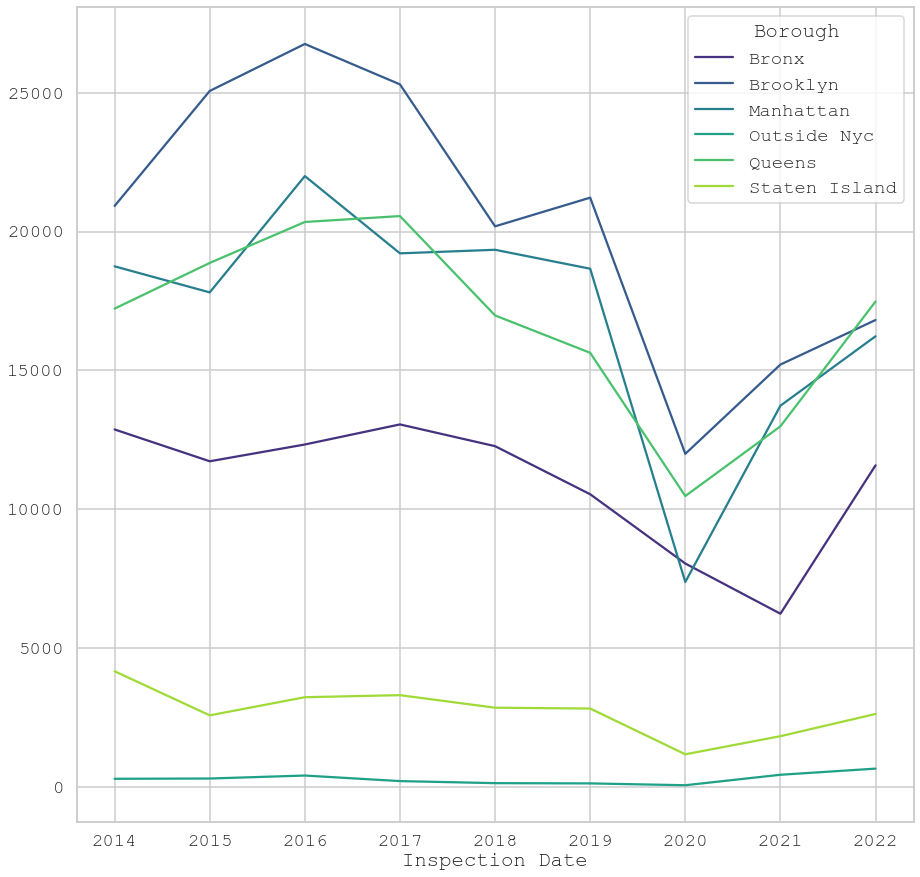

In [128]:
# does this trend hold for all boroughs

pd.crosstab(inspections['Inspection Date'].dt.year, inspections['Borough']).plot(figsize=(15,15))

In [94]:
# were more inspections conducted in some months of the year than others?

inspections['Inspection Date'].groupby(inspections['Inspection Date'].dt.month).count()

Inspection Date
1     49383
2     50230
3     55814
4     53756
5     53510
6     52930
7     51018
8     57365
9     55047
10    50441
11    41642
12    42978
Name: Inspection Date, dtype: int64

<AxesSubplot:xlabel='Inspection Date'>

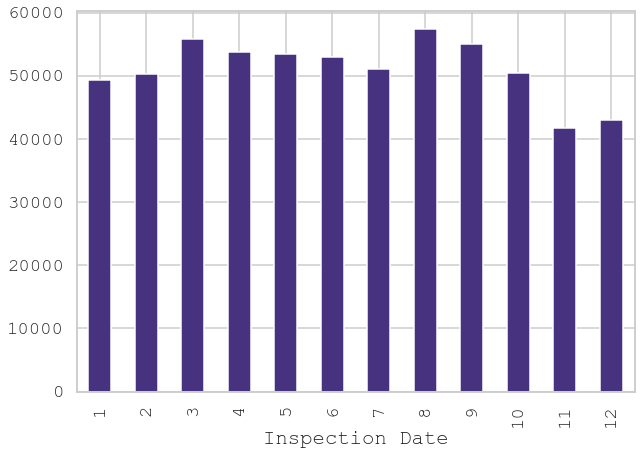

In [113]:
inspections['Inspection Date'].groupby(inspections['Inspection Date'].dt.month).count().plot(kind='bar', figsize=(10,7)) 
                                                                                                           

<AxesSubplot:ylabel='Inspection Date'>

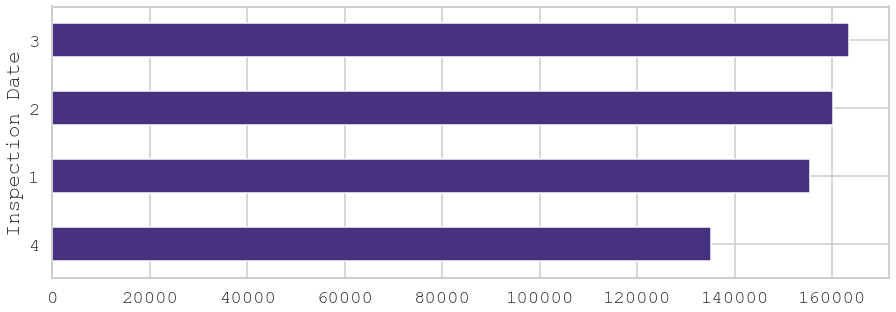

In [110]:
# were more inspections conducted in some quarters of the year than others?

inspections['Inspection Date'].groupby(inspections['Inspection Date'].dt.quarter).count().sort_values().plot(kind='barh', 
                                                                                                           figsize=(15,5))

---

## **5. Next steps**

In [131]:
# export data for data graphic creation

inspection_trends = inspections['Inspection Date'].groupby(inspections['Inspection Date'].dt.year).count()

In [130]:
inspection_trends.to_csv('inspection_trends.csv')

***

---